In [2]:
import os
import numpy as np
# from tqdm import tqdm
import json
import glob
import random

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
# plt.rcParams["font.family"] = "Palatino"
# plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [8,5]})

In [3]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [18]:
def plot_learning_curve(files, item='reward', window=1000, sample=1, firstn=-1,
                        title=None, h_line=None, out_location=None, final=False, y_lims=None, plot_all_runs=False,
                        print_final_reward_rate=False, print_max_value_over_last_tenth=False, 
                        param_names=['agent_name']):

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    symbols = {'eta': '$\eta$', 'alpha': '$\\alpha$', 'gamma': '$\gamma$', 'reward_offset': 'offset',
               'sampled_reward_stddev': r'reward $\sigma$'}
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    which_step_size = 'alpha_w'
    for i, (location, filename) in enumerate(files):
        data = np.load(location + filename, allow_pickle=True).item()
        rewards_train = data[item][:,:firstn]
#         if data['params']['robust_to_initialization']:
        rewards_train -= data['params']['reward_offset']
        max_run_length = rewards_train.shape[1]
        if print_final_reward_rate:
            print(f'Learned reward rate: {np.mean(data["avgrew_final"])}')
#             print(f'Learned reward rate: {np.mean(data["avgrew"][:,-10:], axis=1)}')
#             print(f'Over {data["params"]["num_runs"]} runs: {np.mean(data["avgrew"][:,-10:])} +- {np.std(data["avgrew"][:,-10:])}')
        if print_max_value_over_last_tenth:
            print(f'Max value over the last 10% steps: {np.nanmean(data["max_value_per_step"])}\n')
#         print(f"Best action fraction: {data['best_action_count']/data['params']['num_max_steps']}")
#         print(f"Learned values: {data['weights_final']}\n")
        conv_arr = np.ones(window)
        reward_rate_all = []
        x_s = np.arange(window, max_run_length+1)[::sample] #* data['params']['eval_every_n_steps']
        # ToDo: vectorize this
        for run in range(rewards_train.shape[0]):
            reward_rate = np.convolve(rewards_train[run,:], conv_arr, mode='valid') / window
            reward_rate_all.append(reward_rate)
            if plot_all_runs:
                plt.plot(x_s, reward_rate, alpha=0.1, color=colors[i % len(colors)])
        reward_rate_all = np.array(reward_rate_all)
        mean = np.mean(reward_rate_all, axis=0)
        stderr = np.std(reward_rate_all, axis=0) / np.sqrt(reward_rate_all.shape[0])
        y_s = mean[::sample]
        stderr_s = stderr[::sample]
        label = ', '.join([fr"{symbols[param_name]} = {data['params'][param_name]}" for param_name in param_names])
        plt.plot(x_s, y_s, label=label, color=colors[i % len(colors)])
        plt.fill_between(x_s, y_s + stderr_s, y_s - stderr_s, alpha=0.3)

    if h_line!= None:
        plt.axhline(y=h_line, color='black', alpha=0.3, linestyle='--')
    plt.grid(visible=True, axis='y', alpha=0.5, linestyle='--')
    if y_lims != None:
        plt.ylim(y_lims[0], y_lims[1])
    if not final:
        plt.legend()
        plt.title(title)
    plt.tight_layout()
#     if final:
#         assert os.path.isfile(out_location + title + '.png') == False, "File already exists. Don't overwrite!"
#         plt.savefig(out_location + title + '.png', dpi=1200, transparent=True)
    plt.show()

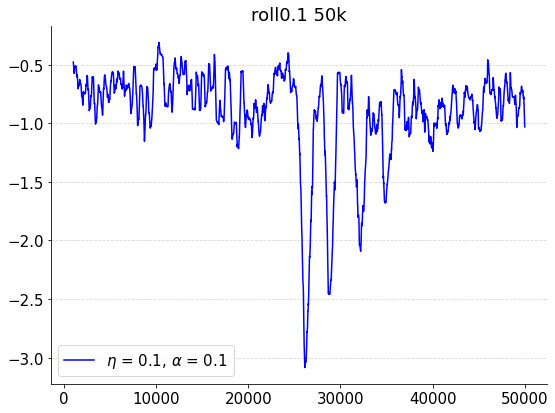

In [14]:
filenames = [
    ('results/test/', 'linear_deroller_50k_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=1000, #y_lims=(0, 1.5),
                    title=r'roll0.1 50k', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

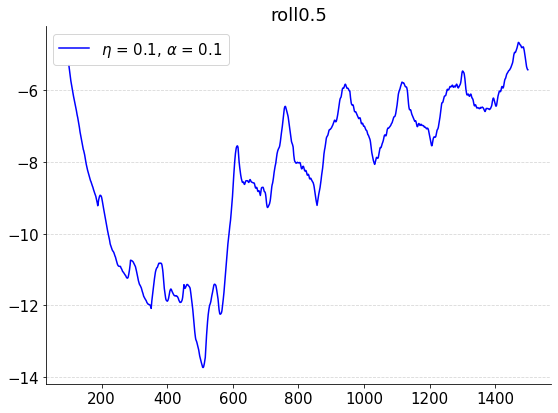

In [12]:
filenames = [
    ('results/test/', 'linear_deroller_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=100, #y_lims=(0, 1.5),
                    title=r'roll0.5', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -3.60737943649292


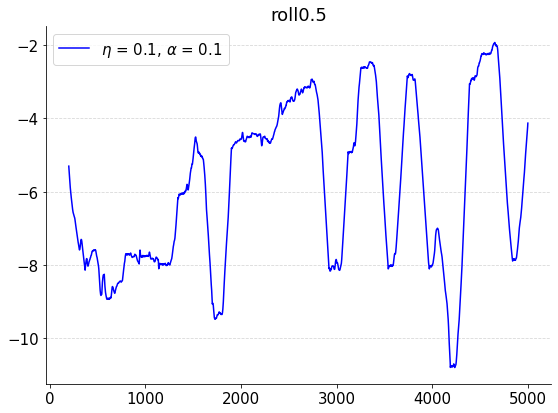

In [19]:
filenames = [
    ('results/test/', 'linear_deroller_alpha0.1_eta0.1_roll0.4_5k_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.5', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -3.7891955375671387


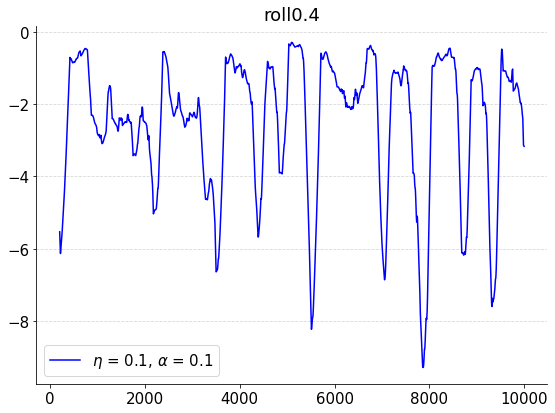

In [21]:
filenames = [
    ('results/test/', 'linear_deroller_alpha0.1_eta0.1_roll0.4_10k_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

In [ ]:
filenames = [
    ('results/test/', 'linear_deroller_alpha0.1_eta0.1_roll0.4_10k_initrolling_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 init

Learned reward rate: -4.534512996673584


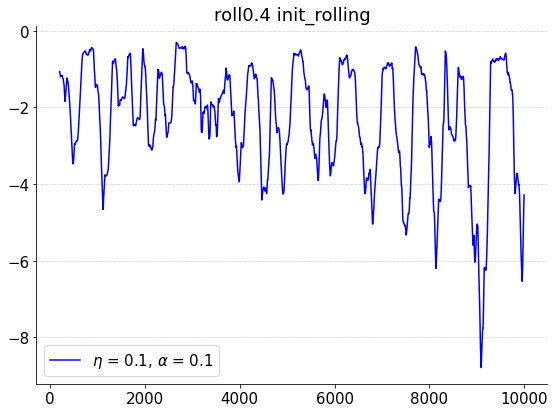

In [22]:
filenames = [
    ('results/test/', 'linear_deroller_alpha0.1_eta0.1_roll0.4_10k_initrolling_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 init_rolling', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -1.5866090059280396


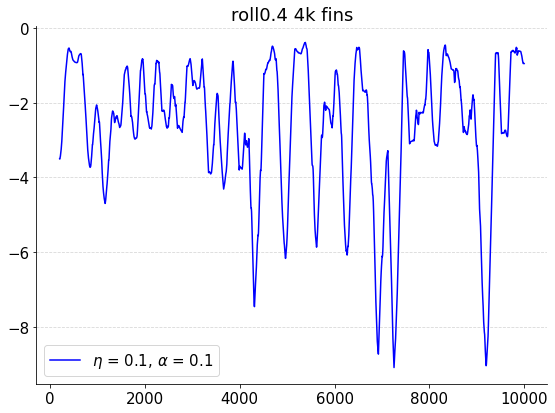

In [23]:
filenames = [
    ('results/test/', 'linear_deroller_alpha0.1_eta0.1_roll0.4_10k_fins_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 4k fins', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -2.5690877437591553


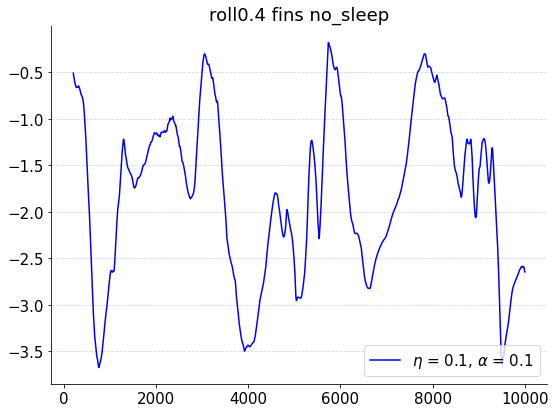

In [32]:
filenames = [
    ('results/test/', 'linear_deroller_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 fins no_sleep', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -10.338395118713379


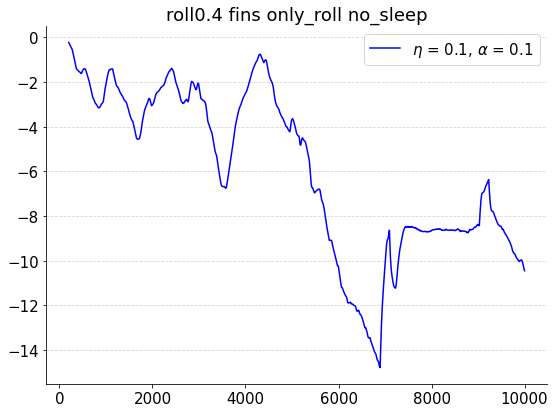

In [34]:
filenames = [
    ('results/test/', 'linear_deroller_onlyroll_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 fins only_roll no_sleep', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: 0.0


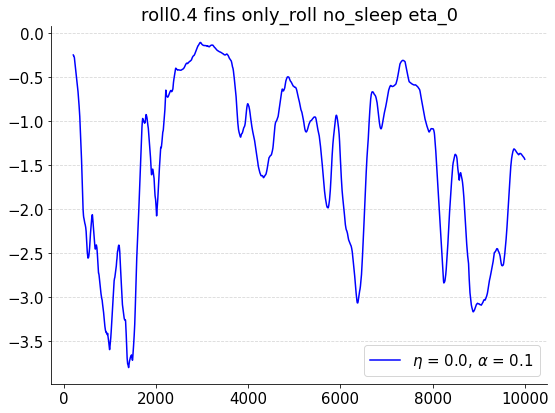

In [35]:
filenames = [
    ('results/test/', 'linear_deroller_onlyroll_eta0_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 fins only_roll no_sleep eta_0', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: 0.0


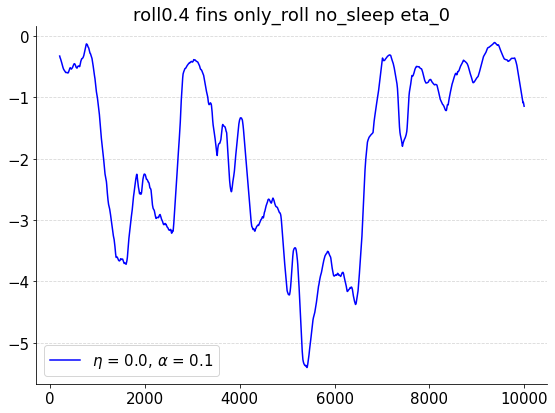

In [36]:
filenames = [
    ('results/test/', 'linear_deroller_onlyroll_eta0_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 fins only_roll no_sleep eta_0', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: 0.0


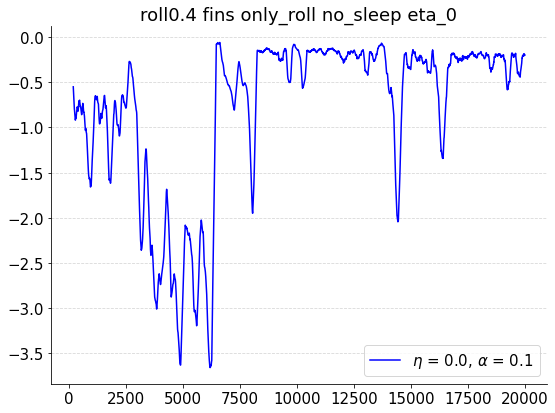

In [37]:
filenames = [
    ('results/test/', 'linear_deroller_onlyroll_eta0_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 fins only_roll no_sleep eta_0', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: 0.0


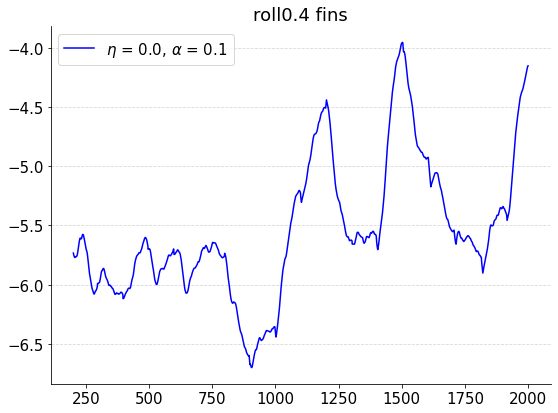

In [38]:
filenames = [
    ('results/test/', 'linear_deroller_fins_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'roll0.4 fins', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: 0.0


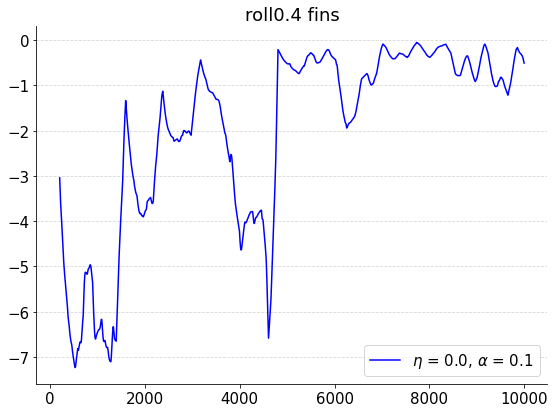

In [39]:
filenames = [
    ('results/test/', 'linear_deroller_fins_test_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'2U 10k no_init_roll', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: 0.0


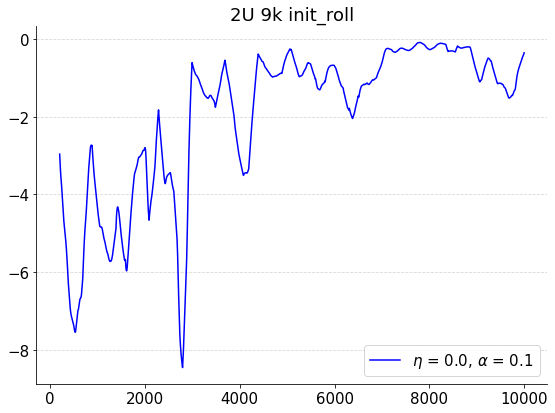

In [40]:
filenames = [
    ('results/test/', 'linear_deroller_fins_initroll_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'2U 9k init_roll', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

## DummyEnv

Learned reward rate: -0.1977328211069107


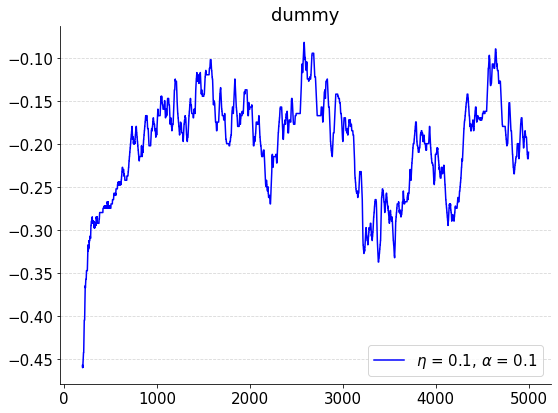

In [27]:
filenames = [
    ('results/test/', 'dummy_alpha0.1_eta0.1_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'dummy', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -0.17315559089183807


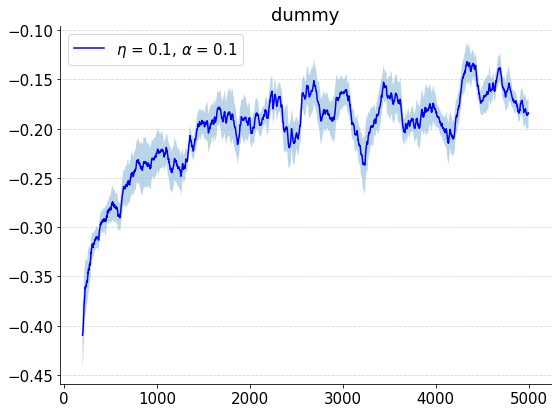

In [28]:
filenames = [
    ('results/test/', 'dummy_alpha0.1_eta0.1_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=200, #y_lims=(0, 1.5),
                    title=r'dummy', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)

Learned reward rate: -0.4232068955898285


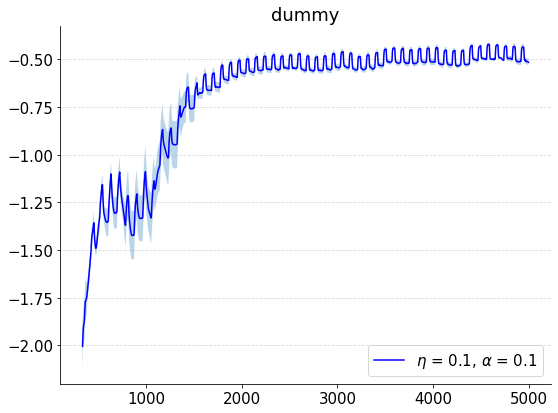

In [31]:
filenames = [
    ('results/test/', 'dummy_alpha0.1_eta0.1_0.npy'),
]

plot_learning_curve(filenames, item='reward', window=331, #y_lims=(0, 1.5),
                    title=r'dummy', final=False, plot_all_runs=False,
                    print_max_value_over_last_tenth=False, param_names=['eta', 'alpha'],
                    print_final_reward_rate=True)